In [3]:
import pandas as pd
import numpy as np

import scipy.stats as stats            # This library is used to plot QQ plot

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [4]:
df = pd.read_csv(r"C:\Users\ASUS\Downloads\train.csv",usecols=['Age','Fare','Survived'])

In [5]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [6]:
df.isnull().sum() # To give a count of missing values

Survived      0
Age         177
Fare          0
dtype: int64

In [7]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [8]:
# Now we have extracted X and y columns
X = df.iloc[:,1:3]
y = df.iloc[:,0]

In [9]:
# Now we are performing train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10456\1351480119.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


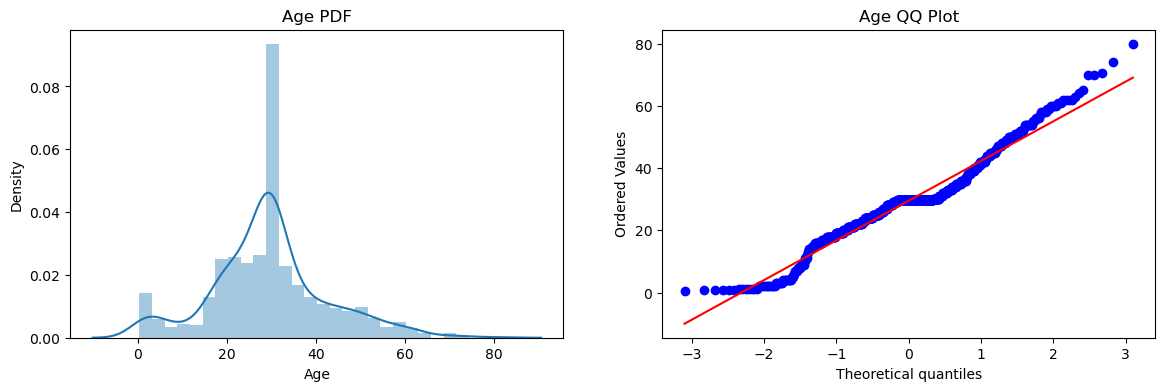

In [14]:
# Plotting the graph for age column
plt.figure(figsize=(14,4))
plt.subplot(121) # Splits the figure into 1 row and 2 columns of subplots.
                 # The number 121 means: 1 row, 2 columns, and this is the 1st subplot.
sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'],dist='norm',plot=plt)
plt.title('Age QQ Plot')

plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10456\116815128.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])


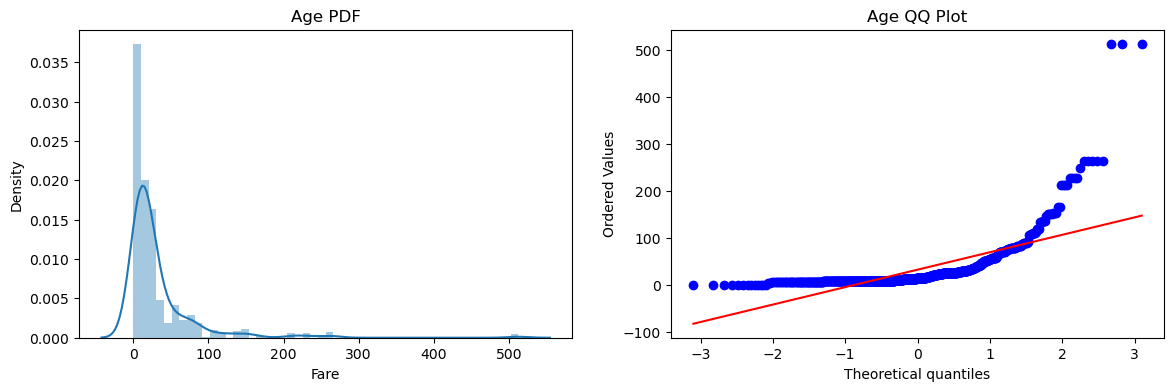

In [15]:
# Plotting the graph for fare column
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'],dist='norm',plot=plt)
plt.title('Age QQ Plot')

plt.show()

In [16]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [19]:
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)

y_pred = clf.predict(X_test)
y_pred1 = clf2.predict(X_test)

print('Accuracy Logistic Regression-', accuracy_score(y_test,y_pred))
print('Accuracy Decision Tree-', accuracy_score(y_test,y_pred1))

Accuracy Logistic Regression- 0.6480446927374302
Accuracy Decision Tree- 0.6703910614525139


In [20]:
# Applying log transformations on both the columns
trf = FunctionTransformer(func=np.log1p)

In [21]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [24]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)

y_pred = clf.predict(X_test_transformed)
y_pred1 = clf2.predict(X_test_transformed)

print('Accuracy Logistic Regression -',accuracy_score(y_test,y_pred))
print('Accuracy Decision Tree -',accuracy_score(y_test,y_pred1))

Accuracy Logistic Regression - 0.6815642458100558
Accuracy Decision Tree - 0.6871508379888268


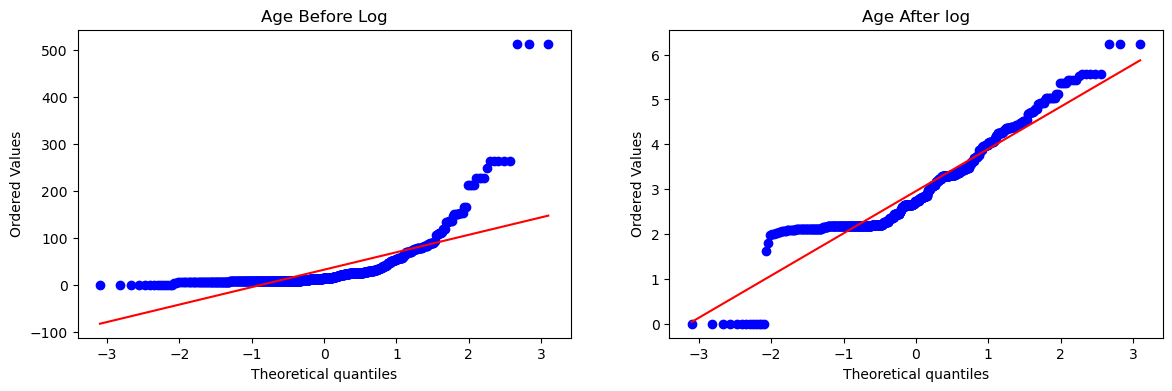

In [25]:
# Let's see the improvement
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'],dist='norm',plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'],dist='norm',plot=plt)
plt.title('Age After log')

plt.show()

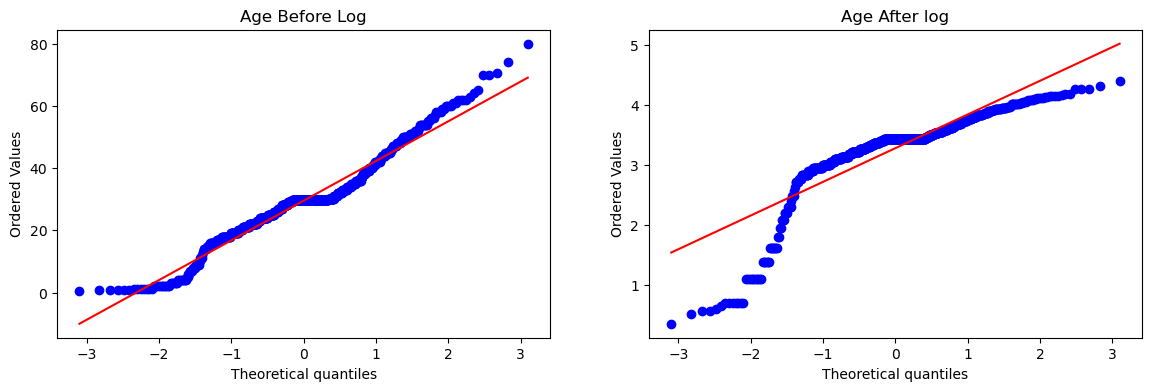

In [26]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'],dist='norm',plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'],dist='norm',plot=plt)
plt.title('Age After log')

plt.show()